
<span style="color: #F3CF18;">
<span style="font-size: 350%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
What is a Percentile in Statistics?
</span>
</span>
</span>
<br />

> <span style="font-size: 150%;">
  <span style="font-family: Comic Sans MS; background: inherit;">
  Term that describes how a score compares to other scores from the same set.
</span>
    </span>

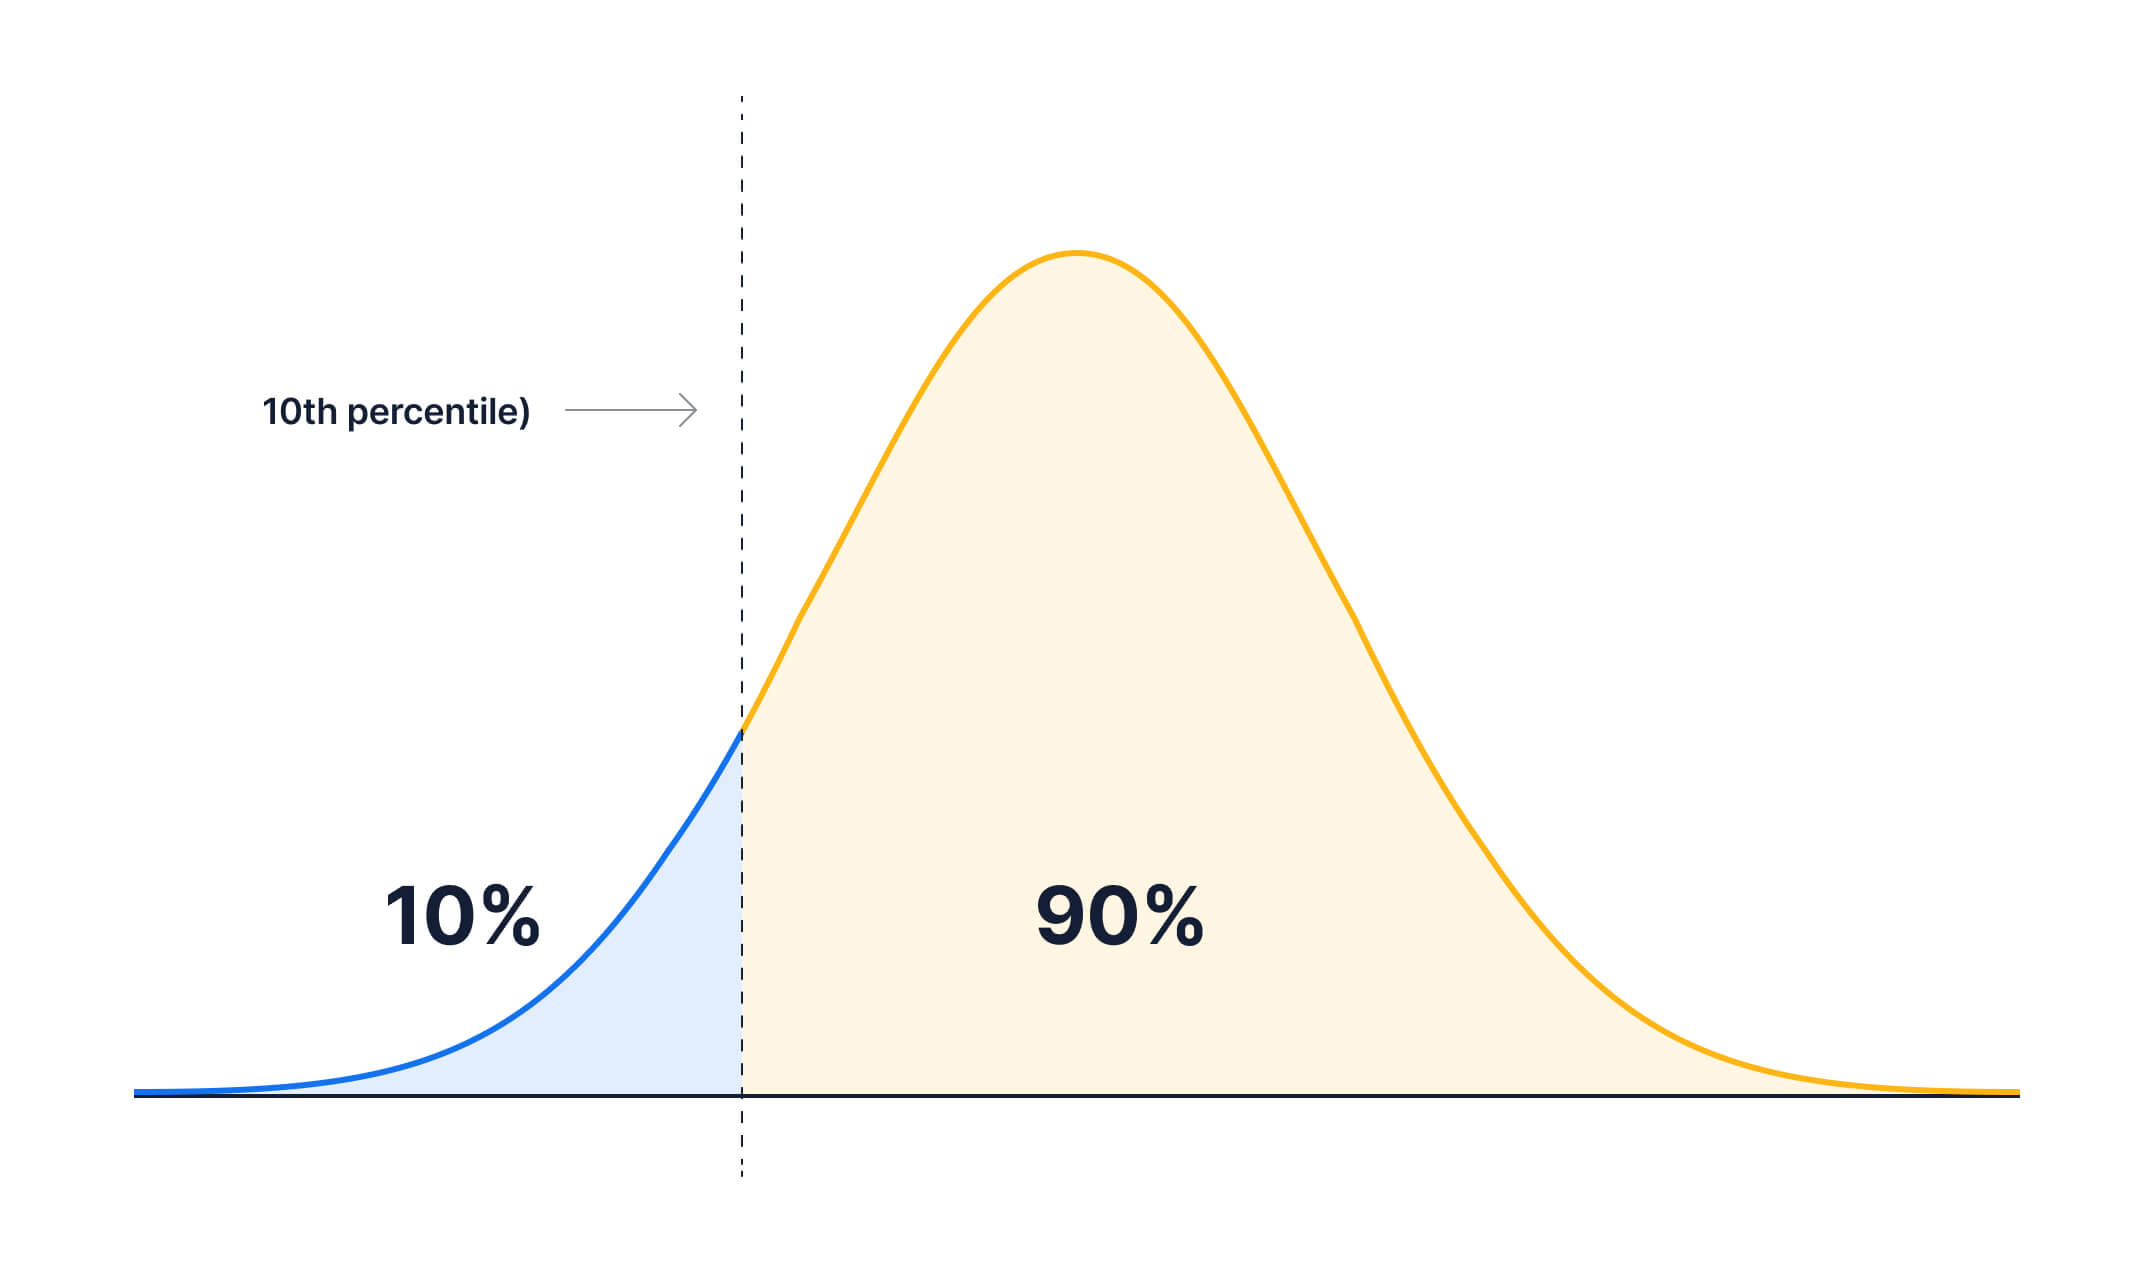

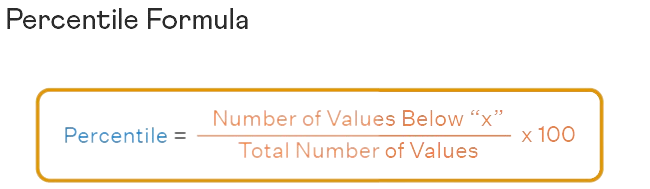

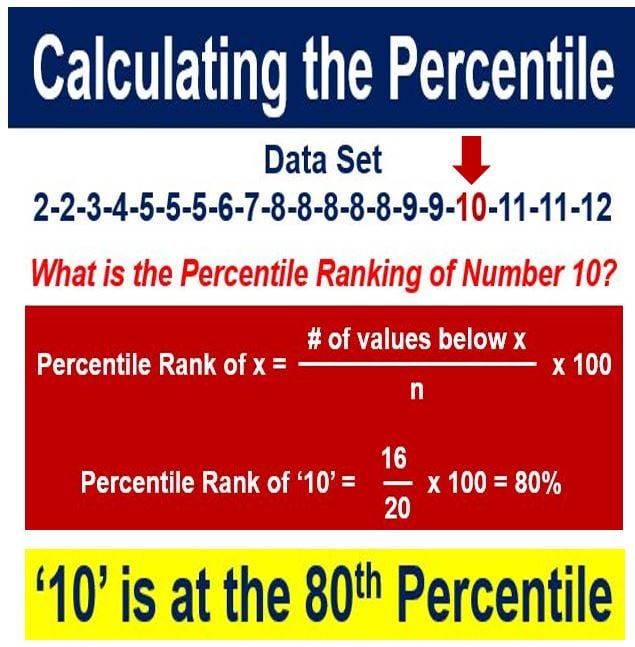

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
ages = [5, 31, 43, 48, 50, 41, 7, 11, 15, 39, 80, 82, 32, 2, 8, 6, 25, 36, 27, 61, 31]
ages1 = sorted(ages)
ages1

[2, 5, 6, 7, 8, 11, 15, 25, 27, 31, 31, 32, 36, 39, 41, 43, 48, 50, 61, 80, 82]

| 0th Percentile | 25th Percentile | 50th Percentile | 75th Percentile | 100th Percentile |
| :---: | :---: | :---: | :---: | :---: |
| 2.0   | 11.0| 31.0 | 43.0 | 82.0 |
| <span style= 'background:yellow'> Min </span> | Q1 |  <span style= 'background:yellow'> Median </span> | Q3 |  <span style= 'background:yellow'> Max </span>  |

In [3]:
print(np.percentile(ages, 0))
print(np.percentile(ages, 25))
print(np.percentile(ages, 50))
print(np.percentile(ages, 75))
print(np.percentile(ages, 100))

2.0
11.0
31.0
43.0
82.0



<span style="color: #F3CF18;">
<span style="font-size: 350%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
How to numpy.percentile Work?
</span>
</span>
</span>

> <span style="font-size: 150%;">
  <span style="font-family: Comic Sans MS; background: inherit;">
  numpy.percentile(a, q, axis = None, out = None, overwrite_input = False,
                      method = 'linear', keepdims = False, *, interpolation=None )
</span>
    </span>
    
<br />
<br />
     <span style="font-size: 150%;">
  <span style="font-family: Comic Sans MS; background: inherit;">
Returns:   percentile (scalar or ndarray)
      <br />
      <br />
If q is a single percentile and axis=None, then the result is a scalar. 
            <br />
      <br />
If the input contains integers or floats smaller than float64, the output data-type is float64. Otherwise, the output data-type is the same as that of the input.

</span>
    </span>

# $$j = i + 1$$
> $i$ is index

> $j$ is index

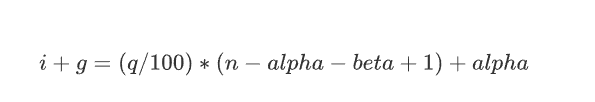

<span style="color: #F3CF18;">
<span style="font-size: 250%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
For linear Method
</span>
</span>
</span>

> $alpha = 1$

> $beta = 1$

> $i$ is the floor 

> $g$ is the fractional part of the index

> $n$ length of data

> $q$ location

In [4]:
def ourPercentile(data,q):
    sort_data = sorted(data)
    n = len(sort_data)
    alpha = 1
    beta = 1
    eq = (q / 100) * (n - alpha - beta + 1) + alpha
    g, i = math.modf(eq)
    if g == 0:
        return float(sort_data[int(i-1)])
    else:
        j = i+1
        return  float(sort_data[int(i-1)] + ((sort_data[int(j-1)] - sort_data[int(i-1)])*g))
    

In [5]:
print(np.percentile(ages, 100))
print(ourPercentile(ages, 100))

82.0
82.0


In [6]:
a = np.array([[10, 7, 4], [3, 2, 1]])
a

array([[10,  7,  4],
       [ 3,  2,  1]])

In [7]:
np.percentile(a, 50)

3.5

In [8]:
np.percentile(a, [0,25,50,75,100])

array([ 1.  ,  2.25,  3.5 ,  6.25, 10.  ])

In [9]:
np.percentile(a, 50, axis=0)

array([6.5, 4.5, 2.5])

In [10]:
np.percentile(a, 50, axis=1)

array([7., 2.])

In [11]:
np.percentile(a, 50, axis=1, keepdims=True)

array([[7.],
       [2.]])

In [12]:
m = np.percentile(a, 50, axis=0)
out = np.zeros_like(m)
print('out : ', out)
np.percentile(a, 50, axis=0, out=out)
print('out : ', out)

out :  [0. 0. 0.]
out :  [6.5 4.5 2.5]


In [13]:
b = a.copy()
print('b : \n',b)
np.percentile(b, 50, axis=0, overwrite_input=True)
print('b : \n',b)
print(np.all(a == b))

b : 
 [[10  7  4]
 [ 3  2  1]]
b : 
 [[ 3  2  1]
 [10  7  4]]
False


In [15]:
a = np.arange(4)
p = np.linspace(0, 100, 6001)
ax = plt.gca()
plt.rcParams["figure.figsize"] = (24,12)
plt.rcParams['figure.dpi'] = 1000
lines = [
    ('linear', '-', 'C0'),
    ('inverted_cdf', ':', 'C1'),
    # Almost the same as `inverted_cdf`:
    ('averaged_inverted_cdf', '-.', 'C1'),
    ('closest_observation', ':', 'C2'),
    ('interpolated_inverted_cdf', '--', 'C1'),
    ('hazen', '--', 'C3'),
    ('weibull', '-.', 'C4'),
    ('median_unbiased', '--', 'C5'),
    ('normal_unbiased', '-.', 'C6'),
    ]
for method, style, color in lines:
    print(method)
    ax.plot(p, np.percentile(a, p, method=method),label=method, linestyle=style, color=color)
    
ax.set(
    title='Percentiles for different methods and data: ' + str(a),
    xlabel='Percentile',
    ylabel='Estimated percentile value',
    yticks=a)
ax.legend()
plt.show()

linear
inverted_cdf
averaged_inverted_cdf
closest_observation
interpolated_inverted_cdf
hazen
weibull
median_unbiased
normal_unbiased


<span style="color: #F80000;">
<span style="font-size: 350%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
Appendix
</span>
</span>
</span>

<br />
<br />
<span style="color: #737373;">
<span style="font-size: 200%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
Discontinuous Results: 
</span>
</span>
</span>


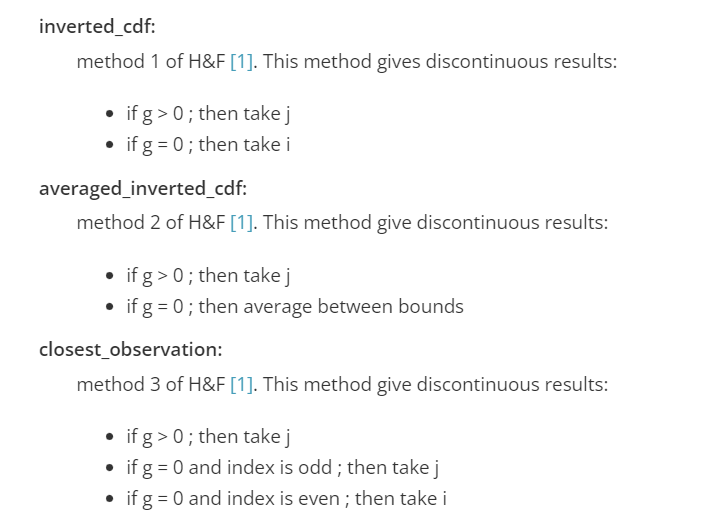

<br />
<br />
<span style="color: #737373;">
<span style="font-size: 200%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
Continuous Results: 
</span>
</span>
</span>

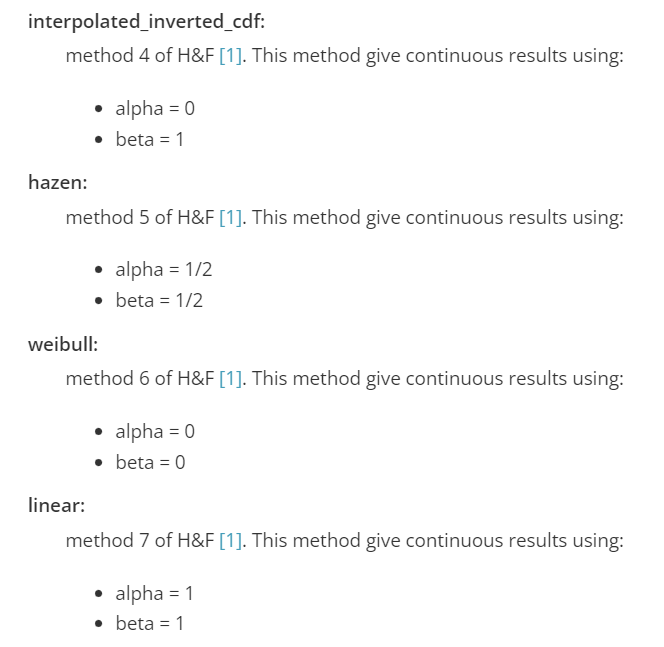

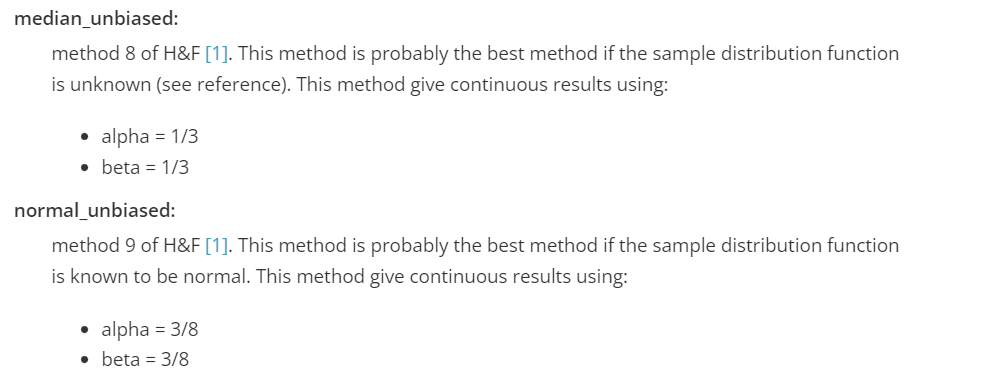

<br />
<br />
<span style="color: #737373;">
<span style="font-size: 200%; background: inherit;">
<span style="font-family: Comic Sans MS; background: inherit;">
Discontinuous Variations of the Default "linear" option:
</span>
</span>
</span>

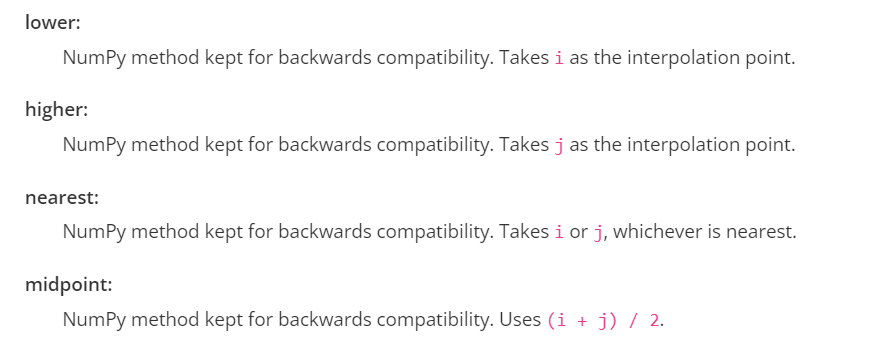

[<br /> <br /> <span style="color: #737373;"><span style="font-size: 200%; background: inherit;"><span style="font-family: Comic Sans MS; background: inherit;">Our Reference: Numpy Documentation</span></span></span>](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html#r08bde0ebf37b-1)
